In [10]:


'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras import backend as K

import matplotlib.pyplot as plt

In [12]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
# input image dimensions
img_rows, img_cols = 28, 28

In [15]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
# input image dimensions
img_rows, img_cols = 28, 28

In [17]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [18]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [19]:
input_shape

(28, 28, 1)

In [20]:
x_train[0, :, :, 0].shape

(28, 28)

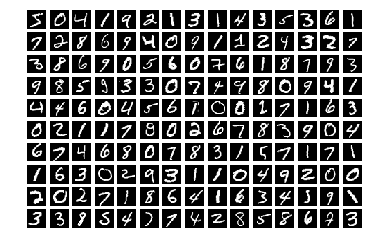

In [21]:
for i in range(150):
    plt.subplot(10, 15, i+1)
    plt.imshow(x_train[i, :, :, 0], cmap='gray')
    plt.axis('off')
    # plt.title(y_train[i])

In [22]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [23]:
labels = set(y_train)
labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [24]:
num_classes = len(labels)
num_classes

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:


model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adadelta(),
    metrics=['accuracy'])



In [28]:
batch_size = 128
epochs = 10
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 160s 3ms/step - loss: 0.2569 - acc: 0.9207 - val_loss: 0.0575 - val_acc: 0.9806
Epoch 2/10
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0875 - acc: 0.9742 - val_loss: 0.0413 - val_acc: 0.9854
Epoch 3/10
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0667 - acc: 0.9804 - val_loss: 0.0336 - val_acc: 0.9890
Epoch 4/10
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0533 - acc: 0.9839 - val_loss: 0.0322 - val_acc: 0.9886
Epoch 5/10
60000/60000 [==============================] - 2603s 43ms/step - loss: 0.0459 - acc: 0.9863 - val_loss: 0.0292 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0406 - acc: 0.9880 - val_loss: 0.0291 - val_acc: 0.9900
Epoch 7/10
60000/60000 [==============================] - 150s 3ms/step 